# Fine tuning classification: policy claims (IV) using curie

We will fine-tune an curie classifier to train six classifiers for each level 2 policy claim 4.1 to 4.6

In [1]:
import pandas as pd
import numpy as np
import re

import openai
import os

from sklearn.metrics import classification_report

# Set openai API key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [2]:
val = pd.read_json('../Classifiers/Data/cat_hearings_03_10_val.json')
test = pd.read_json('../Classifiers/Data/cat_hearings_03_10_test.json')

## Fine-tuning

### 4.1 Climate policies are harmful

In [3]:
# !openai api fine_tunes.create \
#     -t ../Classifiers/Data/train_4_1_prepared.jsonl \
#         -v ../Classifiers/Data/val_4_1_prepared.jsonl \
#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m curie --suffix "L2Pcat3"

### 4.2 Climate policies are ineffective / flawed

In [4]:
# !openai api fine_tunes.create \
#     -t ../Classifiers/Data/train_4_2_prepared.jsonl \
#         -v ../Classifiers/Data/val_4_2_prepared.jsonl \
#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m curie --suffix "L2Pcat3"

### 4.3-4.6 Other reasons against policy 

In [5]:
# !openai api fine_tunes.create \
#     -t ../Classifiers/Data/train_4_3456_prepared.jsonl \
#         -v ../Classifiers/Data/val_4_3456_prepared.jsonl \
#             --compute_classification_metrics --classification_positive_class " 1.0" \
#                 -m curie --suffix "L2Pcat3"

## Results

### 4.1 Climate policies are harmful

In [6]:
!openai api fine_tunes.follow -i ft-c7VMnhgMbAOv5BF5O7jrhypX
!openai api fine_tunes.results -i ft-c7VMnhgMbAOv5BF5O7jrhypX > ../Classifiers/Results/result_4_1_curie_1.csv

[2023-06-01 16:25:48] Created fine-tune: ft-c7VMnhgMbAOv5BF5O7jrhypX
[2023-06-01 16:26:47] Fine-tune costs $1.22
[2023-06-01 16:26:47] Fine-tune enqueued. Queue number: 0
[2023-06-01 16:26:49] Fine-tune started
[2023-06-01 16:32:38] Completed epoch 1/4
[2023-06-01 16:37:26] Completed epoch 2/4
[2023-06-01 16:47:01] Completed epoch 4/4
[2023-06-01 16:47:23] Uploaded model: curie:ft-university-of-exeter:l2pcat3-2023-06-01-15-47-23
[2023-06-01 16:47:24] Uploaded result file: file-wLXGp4BrAMJaVVALvvRugBo4
[2023-06-01 16:47:25] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-university-of-exeter:l2pcat3-2023-06-01-15-47-23 -p <YOUR_PROMPT>


In [7]:
results_4_1 = pd.read_csv('../Classifiers/Results/result_4_1_curie_1.csv')
results_4_1.insert(9, 'claim', '4_1' )
results_4_1.insert(9, 'LLM', 'curie')
results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2362,curie,4_1,0.881423,0.741935,0.766667,0.912824,0.794668,0.754098


<AxesSubplot: >

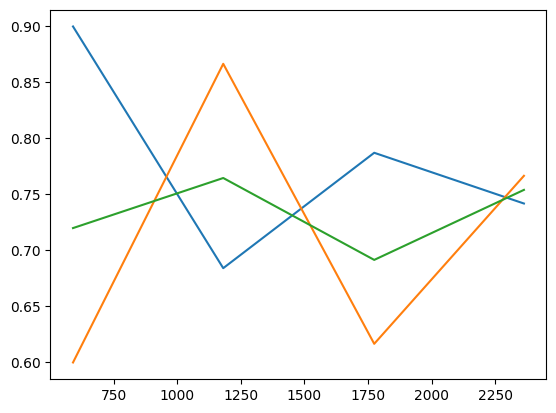

In [8]:
results_4_1[results_4_1['classification/precision'].notnull()]['classification/precision'].plot()
results_4_1[results_4_1['classification/recall'].notnull()]['classification/recall'].plot()
results_4_1[results_4_1['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [9]:
ft_model_4_1 = 'curie:ft-university-of-exeter:l2pcat3-2023-06-01-15-47-23'

predicted_probabilities_4_1 = []
predicted_label_4_1 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_1, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_1.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_1.append(result['choices'][0]['text'])

predictions_4_1 = pd.DataFrame(zip(predicted_probabilities_4_1, predicted_label_4_1), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_1

,predicted_probabilities,predicted_label
0,"{'0': -11.385856, ' 0': -1.8788729e-05}",0
1,"{'0': -9.311458, ' 0': -9.687513e-05}",0
2,"{'0': -14.311573, ' 0': -5.460492e-07}",0
3,"{' 1': -10.968528, ' 0': -2.3795494e-05}",0
4,"{' 1': -7.103118, ' 0': -0.00082349137}",0
...,...,...
248,"{'0': -9.765374, ' 0': -7.398424e-05}",0
249,"{' 1': -4.842947, ' 0': -0.007923224}",0
250,"{'0': -10.771782, ' 0': -2.3078366e-05}",0
251,"{' 1': -4.243733, ' 0': -0.01448658}",0


### 4.2 Climate policies are ineffective / flawed

In [10]:
!openai api fine_tunes.follow -i ft-WBP6rtIrLF491Bzbd7RjfmxO
!openai api fine_tunes.results -i ft-WBP6rtIrLF491Bzbd7RjfmxO > ../Classifiers/Results/result_4_2_curie_1.csv

[2023-06-01 16:27:07] Created fine-tune: ft-WBP6rtIrLF491Bzbd7RjfmxO
[2023-06-01 16:47:26] Fine-tune costs $1.22
[2023-06-01 16:47:26] Fine-tune enqueued. Queue number: 0
[2023-06-01 16:47:27] Fine-tune started
[2023-06-01 16:53:11] Completed epoch 1/4
[2023-06-01 16:57:54] Completed epoch 2/4
[2023-06-01 17:07:20] Completed epoch 4/4
[2023-06-01 17:07:42] Uploaded model: curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-07-41
[2023-06-01 17:07:43] Uploaded result file: file-BZV44NZYwNnH7pAQqJwo9AjV
[2023-06-01 17:07:43] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-07-41 -p <YOUR_PROMPT>


In [11]:
results_4_2 = pd.read_csv('../Classifiers/Results/result_4_2_curie_1.csv')
results_4_2.insert(9, 'claim', '4_2' )
results_4_2.insert(9, 'LLM', 'curie')
results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2362,curie,4_2,0.940711,0.75,0.666667,0.960505,0.79421,0.705882


<AxesSubplot: >

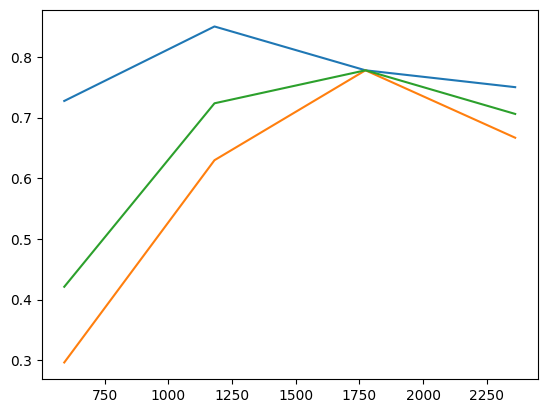

In [12]:
results_4_2[results_4_2['classification/precision'].notnull()]['classification/precision'].plot()
results_4_2[results_4_2['classification/recall'].notnull()]['classification/recall'].plot()
results_4_2[results_4_2['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [14]:
ft_model_4_2 = 'curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-07-41'

predicted_probabilities_4_2 = []
predicted_label_4_2 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_2, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_2.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_2.append(result['choices'][0]['text'])

predictions_4_2 = pd.DataFrame(zip(predicted_probabilities_4_2, predicted_label_4_2), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_2

,predicted_probabilities,predicted_label
0,"{' 1': -13.890435, ' 0': -1.3823812e-06}",0
1,"{'0': -11.466201, ' 0': -2.1171965e-05}",0
2,"{' 1': -15.535475, ' 0': -1.8841804e-07}",0
3,"{'0': -14.424158, ' 0': -9.055464e-07}",0
4,"{' 1': -0.13078246, ' 0': -2.0994925}",1
...,...,...
248,"{' 1': -9.601126, ' 0': -6.89756e-05}",0
249,"{' 1': -1.3762366, ' 0': -0.29116702}",0
250,"{' 1': -12.871115, ' 0': -4.721163e-06}",0
251,"{' 1': -11.049654, ' 0': -1.771398e-05}",0


### 4.3-4.6 Other reasons against policy 

In [15]:
!openai api fine_tunes.follow -i ft-40FcATWzcMM9GuRU5IlnPs2H
!openai api fine_tunes.results -i ft-40FcATWzcMM9GuRU5IlnPs2H > ../Classifiers/Results/result_4_3456_curie_1.csv

[2023-06-01 16:27:22] Created fine-tune: ft-40FcATWzcMM9GuRU5IlnPs2H
[2023-06-01 17:08:00] Fine-tune costs $1.22
[2023-06-01 17:08:00] Fine-tune enqueued. Queue number: 5
[2023-06-01 17:10:59] Fine-tune is in the queue. Queue number: 4
[2023-06-01 17:12:34] Fine-tune is in the queue. Queue number: 3
[2023-06-01 17:13:59] Fine-tune is in the queue. Queue number: 2
[2023-06-01 17:14:06] Fine-tune is in the queue. Queue number: 1
[2023-06-01 17:15:43] Fine-tune is in the queue. Queue number: 0
[2023-06-01 17:15:44] Fine-tune started
[2023-06-01 17:21:20] Completed epoch 1/4
[2023-06-01 17:30:37] Completed epoch 3/4
[2023-06-01 17:35:38] Uploaded model: curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-35-38
[2023-06-01 17:35:39] Uploaded result file: file-0ubYTlRpAkXjU7qyimgZrjAJ
[2023-06-01 17:35:39] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-35-38 -p <YOUR_P

In [16]:
results_4_3456 = pd.read_csv('../Classifiers/Results/result_4_3456_curie_1.csv')
results_4_3456.insert(9, 'claim', '4_3456' )
results_4_3456.insert(9, 'LLM', 'curie')
results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
2362,curie,4_3456,0.865613,0.533333,0.444444,0.83615,0.499455,0.484848


<AxesSubplot: >

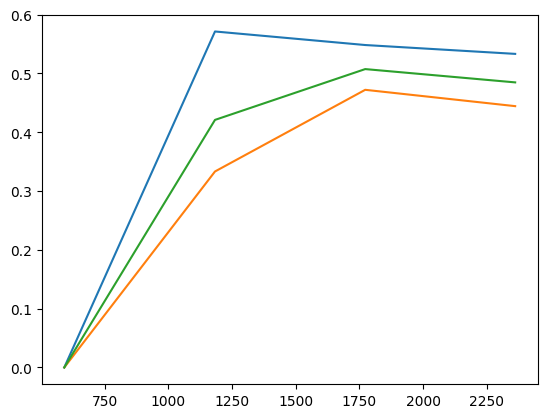

In [17]:
results_4_3456[results_4_3456['classification/precision'].notnull()]['classification/precision'].plot()
results_4_3456[results_4_3456['classification/recall'].notnull()]['classification/recall'].plot()
results_4_3456[results_4_3456['classification/f1.0'].notnull()]['classification/f1.0'].plot()

In [18]:
ft_model_4_3 = 'curie:ft-university-of-exeter:l2pcat3-2023-06-01-16-35-38'

predicted_probabilities_4_3 = []
predicted_label_4_3 = []
for i in val.text:
    result = openai.Completion.create(model=ft_model_4_3, prompt=i + ' ->', max_tokens=1, temperature=0, logprobs=2)
    predicted_probabilities_4_3.append(result['choices'][0]['logprobs']['top_logprobs'][0])
    predicted_label_4_3.append(result['choices'][0]['text'])

predictions_4_3 = pd.DataFrame(zip(predicted_probabilities_4_3, predicted_label_4_3), columns=['predicted_probabilities', 'predicted_label'])

predictions_4_3

,predicted_probabilities,predicted_label
0,"{' 1': -7.584048e-06, ' 0': -11.93118}",1
1,"{'0': -8.900749, ' 0': -0.00013872207}",0
2,"{'0': -14.874582, ' 0': -4.277735e-07}",0
3,"{' 1': -0.00063243933, ' 0': -7.3672433}",1
4,"{'0': -16.322348, ' 0': -1.8841804e-07}",0
...,...,...
248,"{'0': -11.286756, ' 0': -1.9860674e-05}",0
249,"{' 1': -7.0445924, ' 0': -0.0008842211}",0
250,"{'0': -10.146018, ' 0': -4.3227457e-05}",0
251,"{' 1': -0.64931554, ' 0': -0.73902196}",1


## Summary

In [19]:
pd.concat([results_4_1[results_4_1['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_2[results_4_2['classification/accuracy'].notnull()].iloc[:,9:17].tail(1),
           results_4_3456[results_4_3456['classification/accuracy'].notnull()].iloc[:,9:17].tail(1)]).reset_index(drop=True)

,LLM,claim,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,curie,4_1,0.881423,0.741935,0.766667,0.912824,0.794668,0.754098
1,curie,4_2,0.940711,0.750000,0.666667,0.960505,0.794210,0.705882
2,curie,4_3456,0.865613,0.533333,0.444444,0.836150,0.499455,0.484848


In [20]:
# Multi-hot encode the labels
val['predicted_labels_curie'] = pd.concat([predictions_4_1.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                          predictions_4_2.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int),
                                          predictions_4_3.predicted_label.apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)], axis=1).values.tolist()

In [21]:
# curie model results on validation data

# Print the classification report
print("Classification performance\n-------------------")
print(classification_report(val['labels'].values.tolist(), val['predicted_labels_curie'].values.tolist()))

# Check overall performance
# Print the classification report
print("Overall performance\n-------------------")
print(classification_report([1 if sum(i)>0 else 0 for i in val['labels']], [1 if sum(i)>0 else 0 for i in val['predicted_labels_curie']]))

Classification performance
-------------------
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        60
           1       0.75      0.67      0.71        27
           2       0.53      0.44      0.48        36

   micro avg       0.69      0.65      0.67       123
   macro avg       0.68      0.63      0.65       123
weighted avg       0.68      0.65      0.66       123
 samples avg       0.26      0.26      0.25       123

Overall performance
-------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       153
           1       0.78      0.75      0.77       100

    accuracy                           0.82       253
   macro avg       0.81      0.81      0.81       253
weighted avg       0.82      0.82      0.82       253



/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mn/Library/CloudStorage/OneDrive-UniversityofExeter/Projects/GitHub/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Save the predictions

val.to_json("../Classifiers/Data/cat_hearings_03_10_val_curie_labels.json")